# Hidden Markov Model
Hidden Markov Model assumes that the probabilities of changing from state to another are known.

The idea is to predict future states from current state. The predicted state doesn't have to be the next one, but then you have to make predictions for all the intermediate states as well. This results a chain of states.

`hmmlearn` python library performs unsupervised learning.

These variables can be defined manually or you can calculate them from data automatically with the `.fit` function:
* startprob_
* transmat_
* means_
* covars_

In [67]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
#hmm makes warnings about upcoming deprecations, ignore them
import warnings
warnings.simplefilter("ignore")

## Create data and fit the model

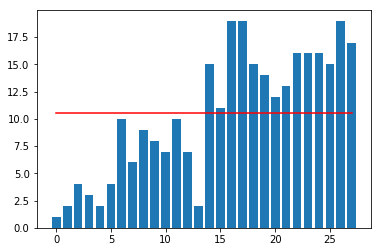

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [77]:
#Variable 1
d_1 = [1,2,4,3,2,4,10,6,9,8,7,10,7,2]
d_2 = [15,11,19,19,15,14,12,13,16,16,16,15,19,17]
#Concatencate and transpose the full list 
d = np.transpose([d_1+d_2])
#Plot values
plt.bar(range(len(d)), d)
plt.plot([0,27],[10.5,10.5], color="red")
plt.show()
#Fit model
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
model.fit(d)

## Print HMM results

In [78]:
#Values by algorithm
for i in range(model.n_components):
    print('\nHidden state', i+1)
    print('Mean =', round(model.means_[i][0], 2))
    print('Variance =', round(np.diag(model.covars_[i])[0], 2))


Hidden state 1
Mean = 15.5
Variance = 5.82

Hidden state 2
Mean = 5.37
Variance = 9.44


In [79]:
#Actual values
i=0
for d_i in (d_1, d_2):
    i+=1
    print('\nList', i)
    print('Mean =', round(np.mean(d_i), 2))
    print('Variance =', round(np.var(d_i), 2))


List 1
Mean = 5.36
Variance = 9.37

List 2
Mean = 15.5
Variance = 5.82
